***House Price prediction with using different machine learning techniques***

wich machine laerning can give us higher accuary to predict house price?

***Import libraries***

In [1]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import scipy
import math
%matplotlib inline


Checking libraries version

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))


matplotlib: 2.2.3
sklearn: 0.20.3
scipy: 1.2.1
pandas: 0.23.4
numpy: 1.16.2


Data Collection

In [3]:
train = pd.read_csv('/Users/elnazvafaei/Desktop/EDX/GitHubUCSD_Exercises/Final project/A-Comprehensive-ML-Workflow-for-HousePrices-master/input/train.csv')
test= pd.read_csv('/Users/elnazvafaei/Desktop/EDX/GitHubUCSD_Exercises/Final project/A-Comprehensive-ML-Workflow-for-HousePrices-master/input/test.csv')

Statistical Summary

In [4]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)
print()
print('train information: ')
print(  train.describe().transpose())

train shape:  (1460, 81)
test shape:  (1459, 80)

train information: 
                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    44

In [5]:
test_ID = test["Id"]


Finding Null Rows

***Distribution of "SalesPrice"***


<Figure size 720x720 with 0 Axes>

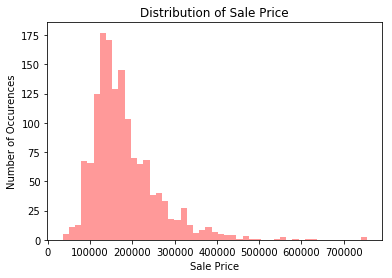

<Figure size 720x720 with 0 Axes>

In [6]:
sns.distplot(train['SalePrice'], color="r", kde=False)

plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")
plt.figure(figsize=(10,10))

<Figure size 432x288 with 0 Axes>

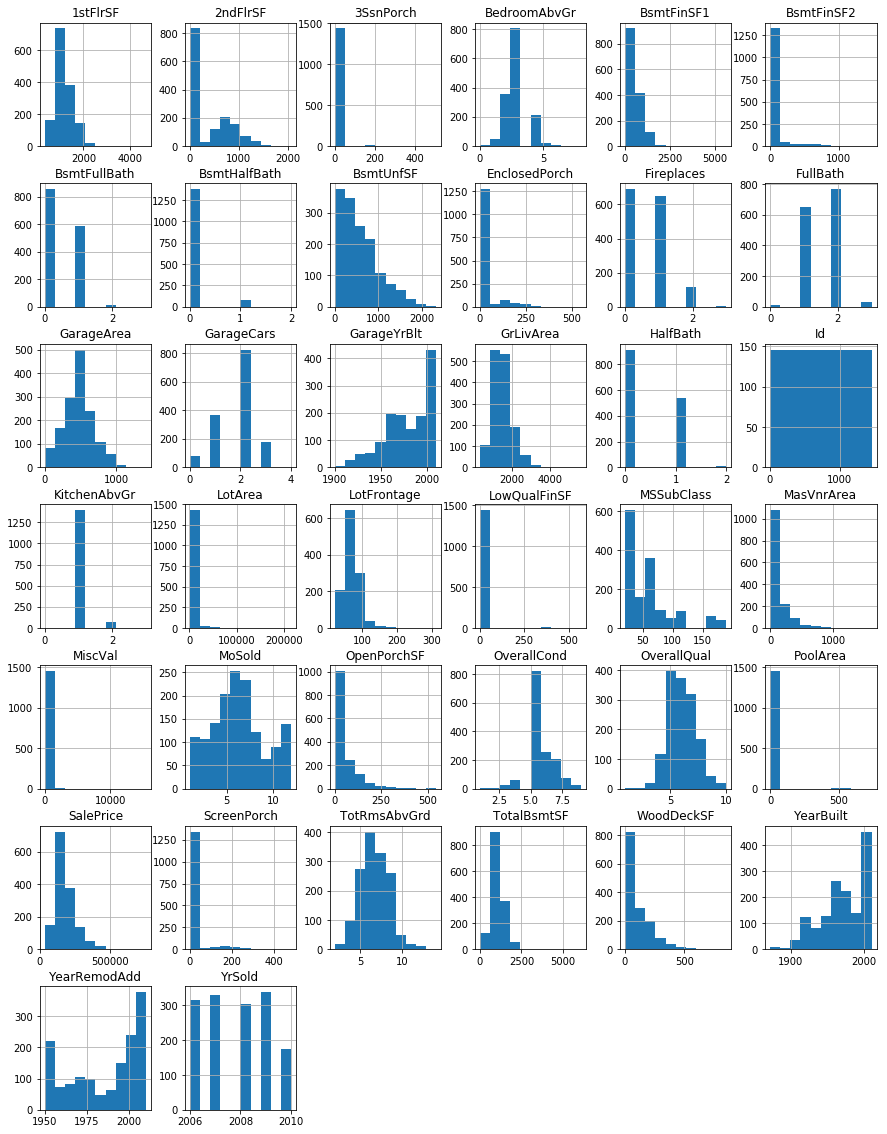

<Figure size 432x288 with 0 Axes>

In [7]:
train.hist(figsize=(15,20))
plt.figure()


<Figure size 432x288 with 0 Axes>

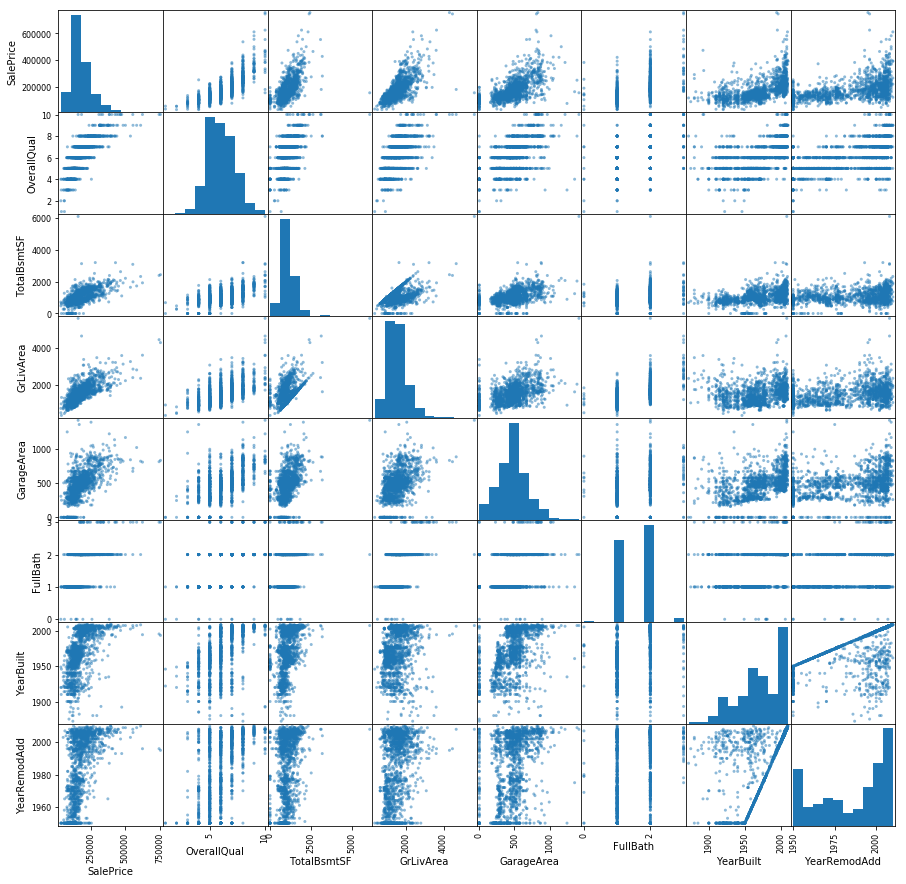

<Figure size 432x288 with 0 Axes>

In [8]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
pd.plotting.scatter_matrix(train[columns],figsize=(15,15))
plt.figure()

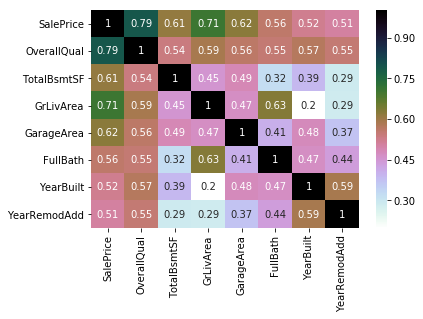

In [9]:

sns.heatmap(train[columns].corr(),annot=True,cmap='cubehelix_r') 
plt.show()


Showing 10 most correlated features with "SalePrice" and the least 10 correlated features with the target value too

In [10]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
corr_features = corr['SalePrice'].sort_values(ascending=False)[:10]
print (corr['SalePrice'].sort_values(ascending=False).transpose()[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [11]:
corr['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

***Features with missing values***

Showing all features which have at least one missing value

In [12]:
nullsQuantity = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[10:20])
nullsQuantity.columns = ['Null Count']
nullsQuantity.index.name = 'Feature'
nullsQuantity.transpose()

Feature,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,Utilities
Null Count,81,38,38,37,37,37,8,8,1,0


### Plotting features with missing values

In total there are 19 features with missing values.

**For Train set:**


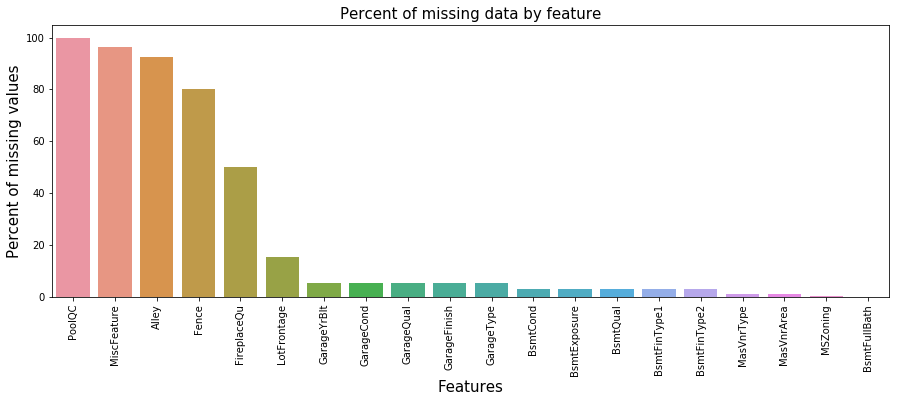

In [13]:
all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:20]

f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent of missing data by feature', fontsize=15)
plt.show()

## Correlation##

In [14]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
corr_features = corr['SalePrice'].sort_values(ascending=False)[10:]
print (corr_features, '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Kitc

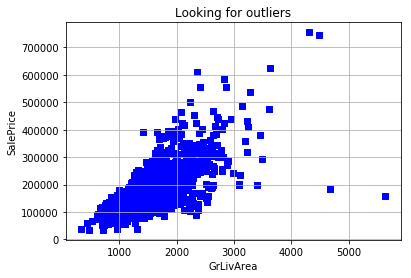

In [15]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

In [16]:
outliers1=train[train.GrLivArea > 4000]
outliers1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


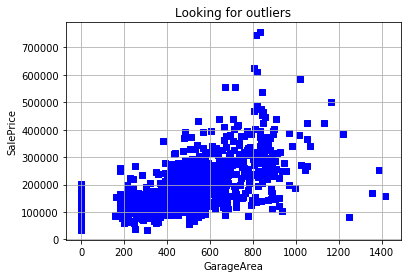

In [17]:
plt.scatter(train.GarageArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

In [18]:
outliers2=train[train.GarageArea > 1200]
outliers2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### Data Cleaning

When dealing with real-world data, dirty data is the norm rather than the exception. We continuously need to predict correct values, impute missing ones, and find links between various data artefacts such as schemas and records. We need to stop treating data cleaning as a piecemeal exercise (resolving different types of errors in isolation), and instead leverage all signals and resources (such as constraints, available statistics, and dictionaries) to accurately predict corrective actions.

In [19]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)
train = train.drop(train[train['Id'] == 1191].index)
train = train.drop(train[train['Id'] == 582].index)
train = train.drop(train[train['Id'] == 1183 ].index)
train = train.drop(train[train['Id'] == 692].index)
train = train.drop(train[train['Id'] == 1062].index)
train = train.drop(train[train['Id'] == 826].index)

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
ytrain_1 = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data = all_data.drop(['Utilities'], axis=1)
train.shape

/Users/elnazvafaei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(1452, 81)

In [21]:
# we can add a feature of the total area of the house 
all_data['TotalSurface'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

### Feature engineering :

In [22]:
all_data = all_data.fillna(0)

### Binarizing some features:

Central air conditionning

Pool Quality (we can drop it)

FireplaceQu: Fireplace quality

Miscfeature

Alley

Fence

BsmtHalfBath

HalfBath

In [23]:
all_data["Electrical"] = all_data["Electrical"].fillna('None')
all_data.shape

(2911, 80)

### Handling non-numerical features :

Features like Basement type, Garage type sould be filled zeros when the value is null, because it means that the house doesn't contain a basement or garage.

In [24]:
# features of basement and garage that has null values means there is no bsement

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','GarageType', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','GarageFinish',
            'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath','BsmtFinType2','BsmtFinType1','GarageQual',
            'GarageCond'):
    all_data[col] = all_data[col].fillna(0)

In [25]:
# we can add a feature of the total area of the house 
all_data['TotalSurface'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

### Log transformation:
In this step, we applied log transformation to all the numerical.

In [26]:
integers = all_data.select_dtypes(include=[('int64')])
floats = all_data.select_dtypes(include=[('float64')])
numericals = pd.concat([integers, floats], axis=1)
numericals.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,Id,...,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF,TotalSurface
0,856,854,0,3,0,0,2,1710,1,1,...,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,856.0,2566.0
1,1262,0,0,3,0,1,2,1262,0,2,...,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,1262.0,2524.0
2,920,866,0,3,0,1,2,1786,1,3,...,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,920.0,2706.0
3,961,756,0,3,272,1,1,1717,0,4,...,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,756.0,2473.0
4,1145,1053,0,4,0,1,2,2198,1,5,...,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,1145.0,3343.0


In [27]:
num_columns = numericals.columns.values.tolist()

all_data[num_columns] = all_data[num_columns].replace(0, np.nan)
all_data.loc[:,num_columns] = np.log(all_data[num_columns])
all_data[num_columns] = all_data[num_columns].replace(np.nan, 0)



In [28]:
all_data = pd.get_dummies(all_data)
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Grvl', 'Street_Pave'],
      dtype='object', length=309)

In [29]:
target1 = pd.DataFrame(ytrain_1, columns=['SalePrice']) 



In [30]:
all_data.shape


(2911, 309)

In [31]:
train_set_1 = all_data[:ntrain]
test_set_1 = all_data[ntrain:]


### Using min max scaler:

In [32]:
#Feature engineering 
# we concatenate both train and test set

ntrain = train.shape[0]
ntest = test.shape[0]
ytrain_2 = train.SalePrice.values

print("all_data size is : ",all_data.shape)


all_data size is :  (2911, 309)



### Min max scaler:

:

In [33]:
num_columns = numericals.columns.values.tolist()
scaler = MinMaxScaler()
all_data.loc[:,num_columns] = scaler.fit_transform(all_data[num_columns])

all_data[num_columns].head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,Id,...,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF,TotalSurface
0,0.345385,0.896476,0.0,0.528321,0.000000,0.0,0.5,0.599333,0.0,0.000000,...,0.0,0.0,0.646017,0.863260,0.430677,0.987403,0.726460,0.715409,0.791033,0.596533
1,0.487844,0.000000,0.0,0.528321,0.000000,0.0,0.5,0.487844,0.0,0.086871,...,0.0,0.0,0.728318,0.839298,0.430677,0.985640,0.762595,0.000000,0.836509,0.591705
2,0.371846,0.898329,0.0,0.528321,0.000000,0.0,0.5,0.615292,0.0,0.137688,...,0.0,0.0,0.782993,0.877483,0.430677,0.987273,0.734312,0.689586,0.799480,0.612075
3,0.387847,0.880287,0.0,0.528321,0.810124,0.0,0.0,0.600833,0.0,0.173743,...,0.0,0.0,0.811167,0.884931,0.682606,0.987079,0.712530,0.000000,0.776480,0.585733
4,0.452138,0.924296,0.0,0.666667,0.000000,0.0,0.5,0.691468,0.0,0.201709,...,0.0,0.0,0.798640,0.921075,0.682606,0.987208,0.771086,0.793999,0.825111,0.673923


In [34]:
all_data = pd.get_dummies(all_data)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,0.345385,0.896476,0.0,0.528321,0.790644,0.0,0.0,0.0,0.646017,0.000000,...,0,0,0,0,0,0,0,1,0,1
1,0.487844,0.000000,0.0,0.528321,0.829925,0.0,0.0,0.0,0.728318,0.000000,...,0,0,0,0,0,0,0,1,0,1
2,0.371846,0.898329,0.0,0.528321,0.745637,0.0,0.0,0.0,0.782993,0.000000,...,0,0,0,0,0,0,0,1,0,1
3,0.387847,0.880287,0.0,0.528321,0.647893,0.0,0.0,0.0,0.811167,0.810124,...,0,0,0,0,0,0,0,1,0,1
4,0.452138,0.924296,0.0,0.666667,0.781607,0.0,0.0,0.0,0.798640,0.000000,...,0,0,0,0,0,0,0,1,0,1


In [35]:
print ("Train data shape:", train_set_1.shape)


Train data shape: (1452, 309)


In [36]:
print ("Test data shape:", test_set_1.shape)


Test data shape: (1459, 309)


### Building the model with different Machine Learning algorithms

In [37]:
# we apply log to the target value
X = train_set_1
y = np.log(ytrain_1)


y


array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

### PCA Principal Component Analysis

In [38]:
scaler = StandardScaler()
scaler.fit(X)                
t_train = scaler.transform(X)
pca_hp = PCA(30)
x_fit = pca_hp.fit_transform(t_train)
np.exp(pca_hp.explained_variance_ratio_)

/Users/elnazvafaei/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/elnazvafaei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.0643751 , 1.03142032, 1.02782558, 1.02225039, 1.02139815,
       1.01722809, 1.01545321, 1.01477183, 1.01267518, 1.01215091,
       1.01172937, 1.01126724, 1.01056532, 1.01038085, 1.01019721,
       1.00971721, 1.00961857, 1.00937728, 1.0091265 , 1.00898341,
       1.00854362, 1.00819898, 1.00812624, 1.00782803, 1.00768369,
       1.00750691, 1.00750095, 1.00734889, 1.00724448, 1.00714775])

### Train Test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



y_train = y_train.ravel()
y_test = y_test.ravel()


k_fold = KFold(len(y), shuffle=True, random_state=0)


### Random Forest

In [40]:
# Fit Random Forest on Training Set
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
model_random_forest = regressor.fit(X_train, y_train)

print ("Test score is: \n", model_random_forest.score(X_test, y_test)) 

predict = cross_val_predict(model_random_forest, X_test, y_test, cv=5 )


Test score is: 
 0.8752570258273759


In [41]:
predictions_1 = model_random_forest.predict(X_test)
print("Root Mean squared Error : " , sqrt(mean_squared_error(y_test,predictions_1)))


Root Mean squared Error :  0.13884127741760213


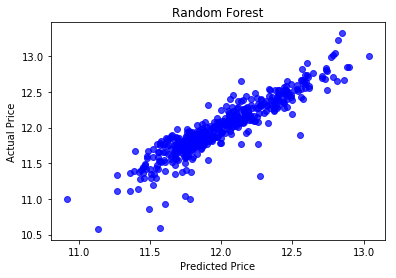

In [42]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest')
plt.show()


### KNN K-Nearest Neighbors

In [43]:
k=5
knn = neighbors.KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=k, p=2,
          weights='uniform')

knn.fit(X_train, y_train)

cross_valid_scores = cross_val_score(knn, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", knn.score(X_test, y_test)) 

predict = cross_val_predict(knn, X_test, y_test, cv=5 )


Test score is: 
 0.746964567293604


In [44]:
predictions_KNN = knn.predict(X_test)
print("Root Mean squared Error : " , math.sqrt(mean_squared_error(y_test,predictions_KNN)))


Root Mean squared Error :  0.19774304775169274


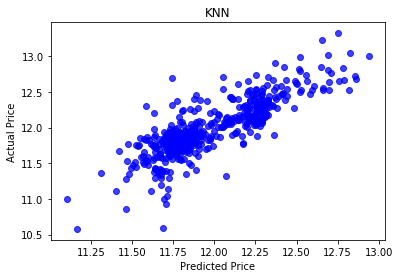

In [45]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('KNN')
plt.show()

### Linear Regression

In [46]:
# SVM
svr_model = SVR(kernel='rbf', C=2, epsilon=0.05)
svr_model.fit(X_train, y_train)

print ("Test score is: \n", svr_model.score(X_test, y_test)) 

/Users/elnazvafaei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test score is: 
 0.8733518691213664


In [47]:
predictions_SVR = svr_model.predict(X_test)
print("Root Mean Squared Error : " , math.sqrt(mean_squared_error(y_test,predictions_SVR)))


Root Mean Squared Error :  0.13989749750782055


In [48]:
# Define model
basic_decision_tree = DecisionTreeRegressor()
# Fit model
basic_decision_tree.fit(X_train, y_train)
print ("Test score is: \n", basic_decision_tree.score(X_test, y_test)) 

predict = cross_val_predict(basic_decision_tree, X_test, y_test, cv=5 )

Test score is: 
 0.7476004898293751


In [49]:
predictions_BDC = basic_decision_tree.predict(X_test)
print("Root Mean Squared Error : " , sqrt(mean_squared_error(y_test,predictions_BDC)))

Root Mean Squared Error :  0.19749440991084113


In [50]:
X_train_lasso=RobustScaler(X_train)
y_train_lasso=RobustScaler(y_train)

In [51]:
# Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train, y_train)

print ("Test score is: \n", lasso.score(X_test, y_test)) 

predict = cross_val_predict(lasso, X_test, y_test, cv=5 )

Test score is: 
 0.908197625190151


In [52]:
predictions_lasso = lasso.predict(X_test)
print("Root Mean squared Error : " , math.sqrt(mean_squared_error(y_test,predictions_lasso)))

Root Mean squared Error :  0.11910706184860652


In [53]:
test_ID = test["Id"]
submission = pd.DataFrame()

submission['Id'] = test_ID

In [54]:
submission1 = pd.DataFrame()
submission1['Id'] = test_ID

In [55]:
predictions = basic_decision_tree.predict(test_set_1)
final_predictions = np.exp(predictions)
submission['SalePrice'] = final_predictions
submission.head(10)

,Id,SalePrice
0,1461,123000.0
1,1462,165000.0
2,1463,175000.0
3,1464,173000.0
4,1465,260000.0
5,1466,195000.0
6,1467,185000.0
7,1468,173000.0
8,1469,167000.0
9,1470,134500.0


In [56]:
submission.to_csv("/Users/elnazvafaei/Desktop/EDX/Data_Science_UCSD/Python_for_Data_Science/Week10/submission0.csv", index=False)

In [57]:
predictions1 = svr_model.predict(test_set_1)
final_predictions1= np.exp(predictions1)
submission1['SalePrice'] = final_predictions1
submission1.head(10)

,Id,SalePrice
0,1461,114817.468063
1,1462,148041.607146
2,1463,188093.016209
3,1464,201924.662424
4,1465,178498.886110
5,1466,169023.974032
6,1467,162233.126486
7,1468,167882.100260
8,1469,174051.490769
9,1470,127439.045619


In [58]:
submission1.to_csv("/Users/elnazvafaei/Desktop/EDX/Data_Science_UCSD/Python_for_Data_Science/Week10/submission1.csv", index=False)

In [59]:
submission2 = pd.DataFrame()
submission2['Id'] = test_ID
predictions2=model_random_forest.predict(test_set_1)
final_predictions2= np.exp(predictions2)
submission2['SalePrice'] = final_predictions2
submission2.head(10)

,Id,SalePrice
0,1461,124594.398555
1,1462,159357.640852
2,1463,175122.845779
3,1464,185719.593907
4,1465,208692.465257
5,1466,173911.743493
6,1467,166781.099076
7,1468,169498.619634
8,1469,188468.433853
9,1470,114464.956651


In [60]:
submission2.to_csv("/Users/elnazvafaei/Desktop/EDX/Data_Science_UCSD/Python_for_Data_Science/Week10/submission2.csv", index=False)

In [61]:
submission3 = pd.DataFrame()
submission3['Id'] = test_ID
predictions3 = lasso.predict(test_set_1)
final_predictions3 = np.exp(predictions3)
#final_predictions = predictions
submission3['SalePrice'] = final_predictions3
submission3.head(10)

,Id,SalePrice
0,1461,120561.451544
1,1462,159315.149233
2,1463,190532.590453
3,1464,198948.192988
4,1465,195863.179004
5,1466,168267.526054
6,1467,174494.287264
7,1468,158208.083685
8,1469,196388.790128
9,1470,121003.166990


In [62]:
submission2.to_csv("/Users/elnazvafaei/Desktop/EDX/Data_Science_UCSD/Python_for_Data_Science/Week10/submission2.csv", index=False)